In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [25]:
df = pd.DataFrame({
'col1':np.random.normal(0,2,100),
'col2':np.random.normal(5,3,100),
'col3':np.random.normal(-5,5,100)})

### 정규화 : 하나 이상의 독립변수 수치규모를 동일하게 하고자 하는 경우 

<Axes: ylabel='Density'>

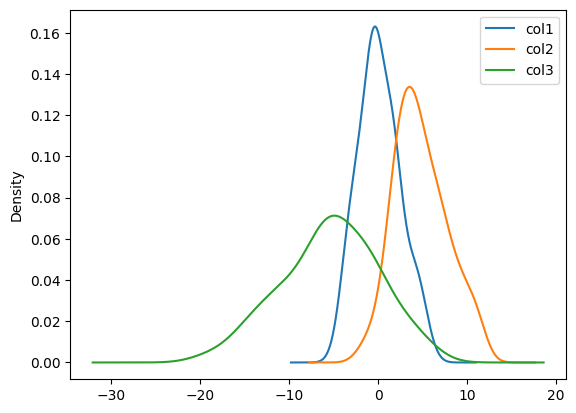

In [6]:
df.plot.kde()

In [18]:
std = StandardScaler()
mmx = MinMaxScaler()
rbs = RobustScaler()
std_df = std.fit_transform(df)
mmx_df = mmx.fit_transform(df)
rbs_df = rbs.fit_transform(df)

In [19]:
std_df = pd.DataFrame(std_df,columns = ['col1','col2','col3'])
mmx_df = pd.DataFrame(mmx_df,columns = ['col1','col2','col3'])
rbs_df = pd.DataFrame(rbs_df,columns = ['col1','col2','col3'])

<Axes: ylabel='Density'>

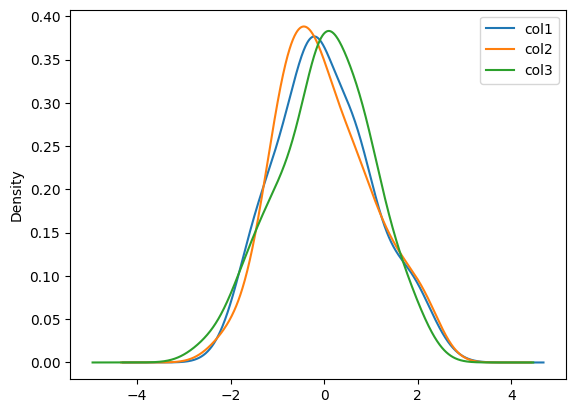

In [11]:
std_df.plot.kde()

<Axes: ylabel='Density'>

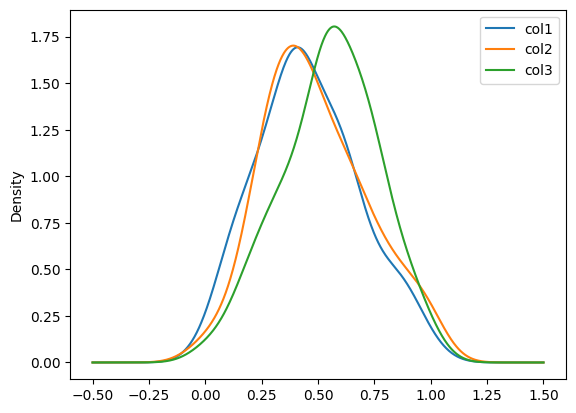

In [16]:
mmx_df.plot.kde()

<Axes: ylabel='Density'>

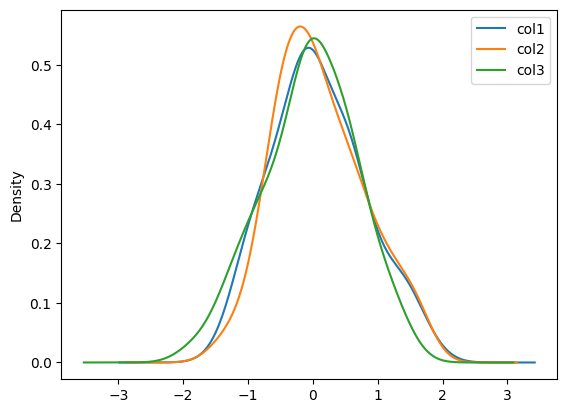

In [20]:
rbs_df.plot.kde()

In [22]:
df_train  = pd.read_csv('./train.csv')
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [27]:
df_train.columns[:10]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities'],
      dtype='object')

In [28]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

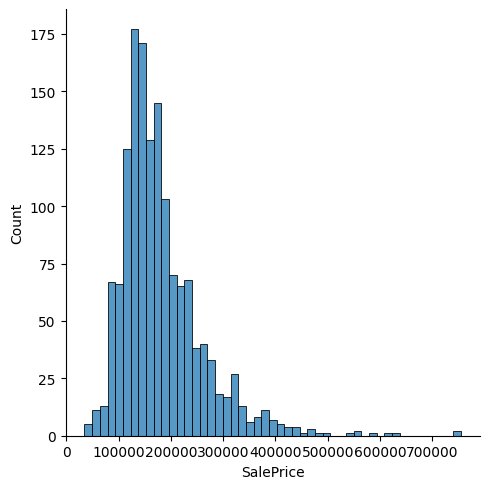

In [29]:
sns.displot(df_train['SalePrice'])

In [30]:
from mpl_toolkits.mplot3d import Axes3D

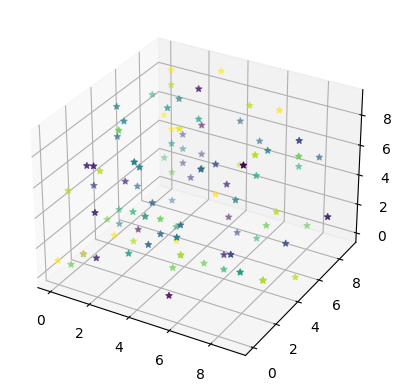

In [34]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
n= 100
x1 = np.random.randint(0,10,size=n)
x2 = np.random.randint(0,10,size=n)
x3 = np.random.randint(0,10,size=n)
x4 = np.random.randint(0,10,size=n)
ax.scatter(x1,x2,x3, c=x4,marker='*')
plt.show()

In [47]:
x4

array([9, 2, 9, 8, 7, 8, 0, 5, 8, 1, 1, 2, 6, 3, 3, 1, 4, 4, 6, 7, 9, 3,
       5, 4, 0, 8, 2, 9, 6, 9, 7, 8, 7, 6, 4, 5, 0, 7, 8, 2, 2, 9, 9, 7,
       3, 7, 2, 7, 1, 8, 0, 4, 3, 6, 7, 4, 4, 0, 1, 6, 6, 2, 3, 3, 6, 3,
       9, 8, 3, 4, 6, 1, 0, 5, 7, 9, 3, 8, 7, 8, 3, 7, 4, 1, 1, 0, 6, 5,
       9, 9, 1, 2, 2, 6, 8, 8, 3, 4, 8, 4])

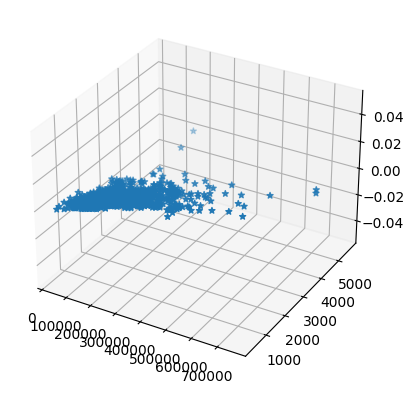

In [36]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(df_train['SalePrice'], df_train['GrLivArea'], marker='*')
plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

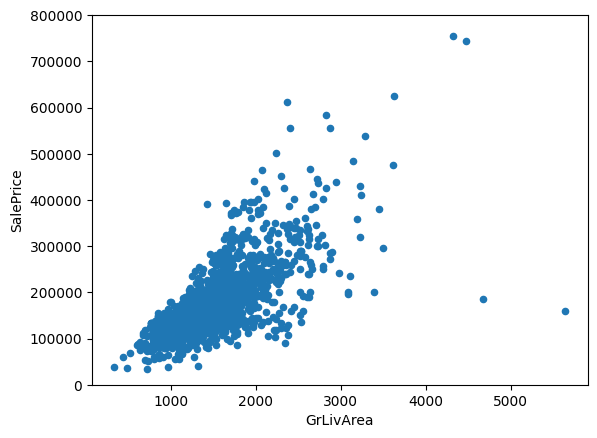

In [46]:
data = df_train[['SalePrice','GrLivArea']]
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim = (0, 800000))

In [43]:
data = pd.concat([df_train['SalePrice'],df_train['GrLivArea']], axis=1)
data1.head(3)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

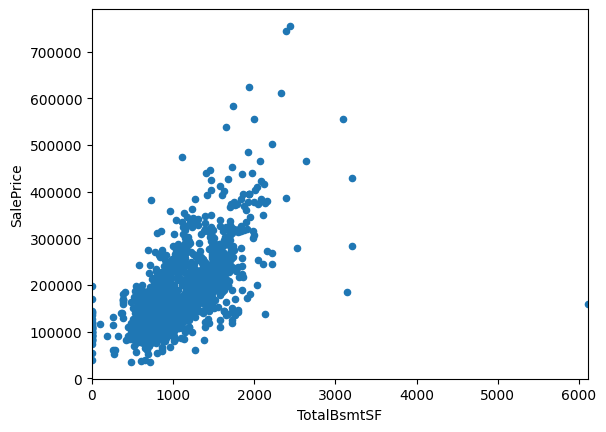

In [55]:
data = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', xlim= (0,data['TotalBsmtSF'].max()) )

In [56]:
'SalePrice' if 'SalePrie' in df_train.columns else 'ZZ'

'ZZ'

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

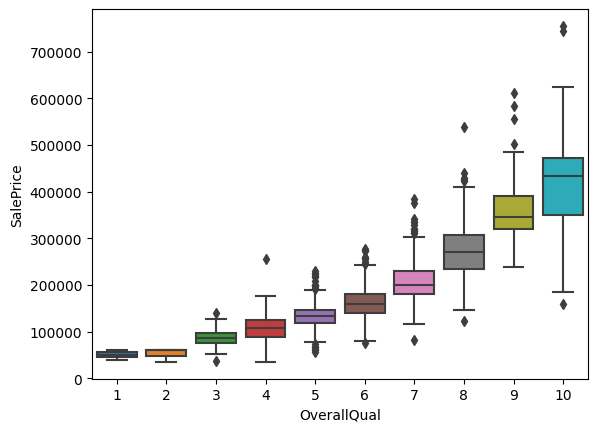

In [58]:
data = pd.concat([df_train['SalePrice'],df_train['OverallQual']], axis=1)
sns.boxplot(data=data, x='OverallQual', y = 'SalePrice')

<Axes: xlabel='OverallQual'>

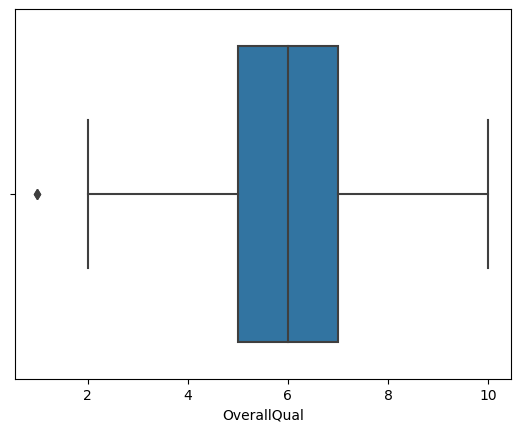

In [60]:
sns.boxplot(data=df_train, x='OverallQual')

In [61]:
data = df_train.corr()

<Axes: >

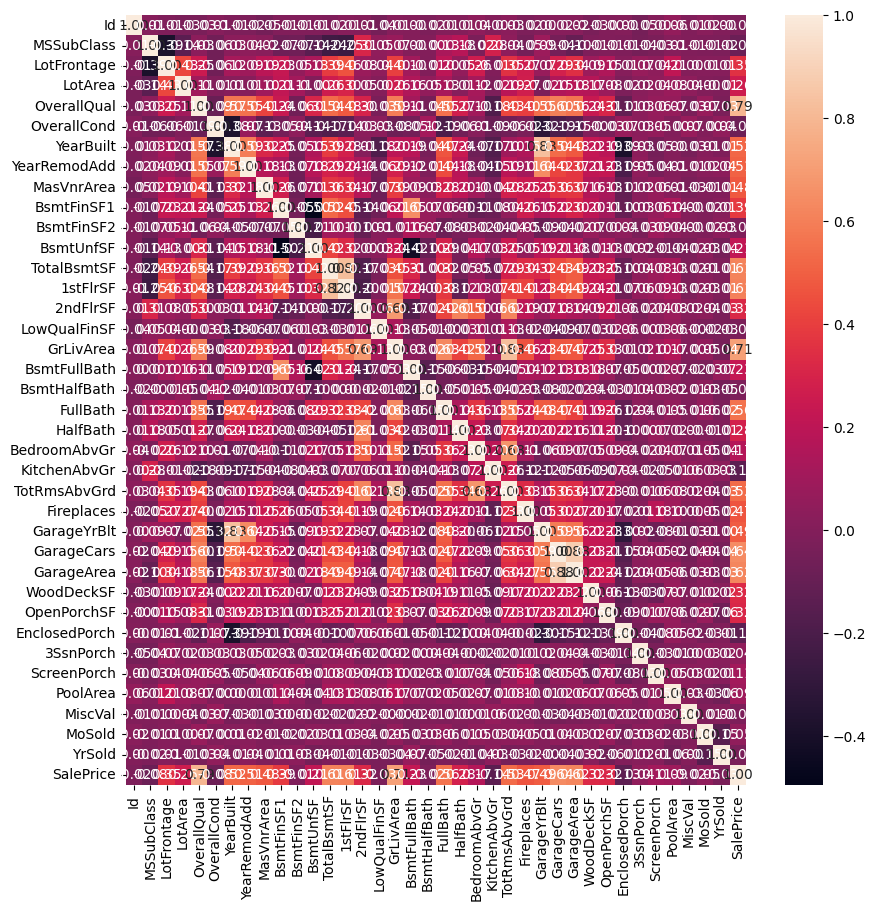

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(data, fmt='.2f', annot=True)

### 오름차순 nlargest(n=출력행수, columns=[정렬기준 항목, 정렬기준 항목]) 
### 내림차순 nsmallest(n=출력행수, columns=[정렬기준 항목, 정렬기준 항목]) 

In [71]:
# data['SalePrice']와 상관성이 높은 10건만 추출 
top10 = data.nlargest(10,'SalePrice')
top10

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [77]:
cols = top10.index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

### data['SalePrice']와 상관성이 높은 10개 항목에 대해 상관관계 분석 

<Axes: >

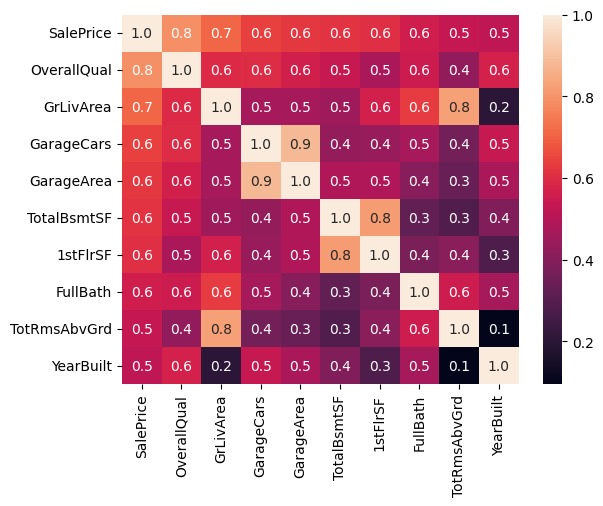

In [79]:
sns.heatmap(df_train[cols].corr(), annot=True, fmt='.1f')

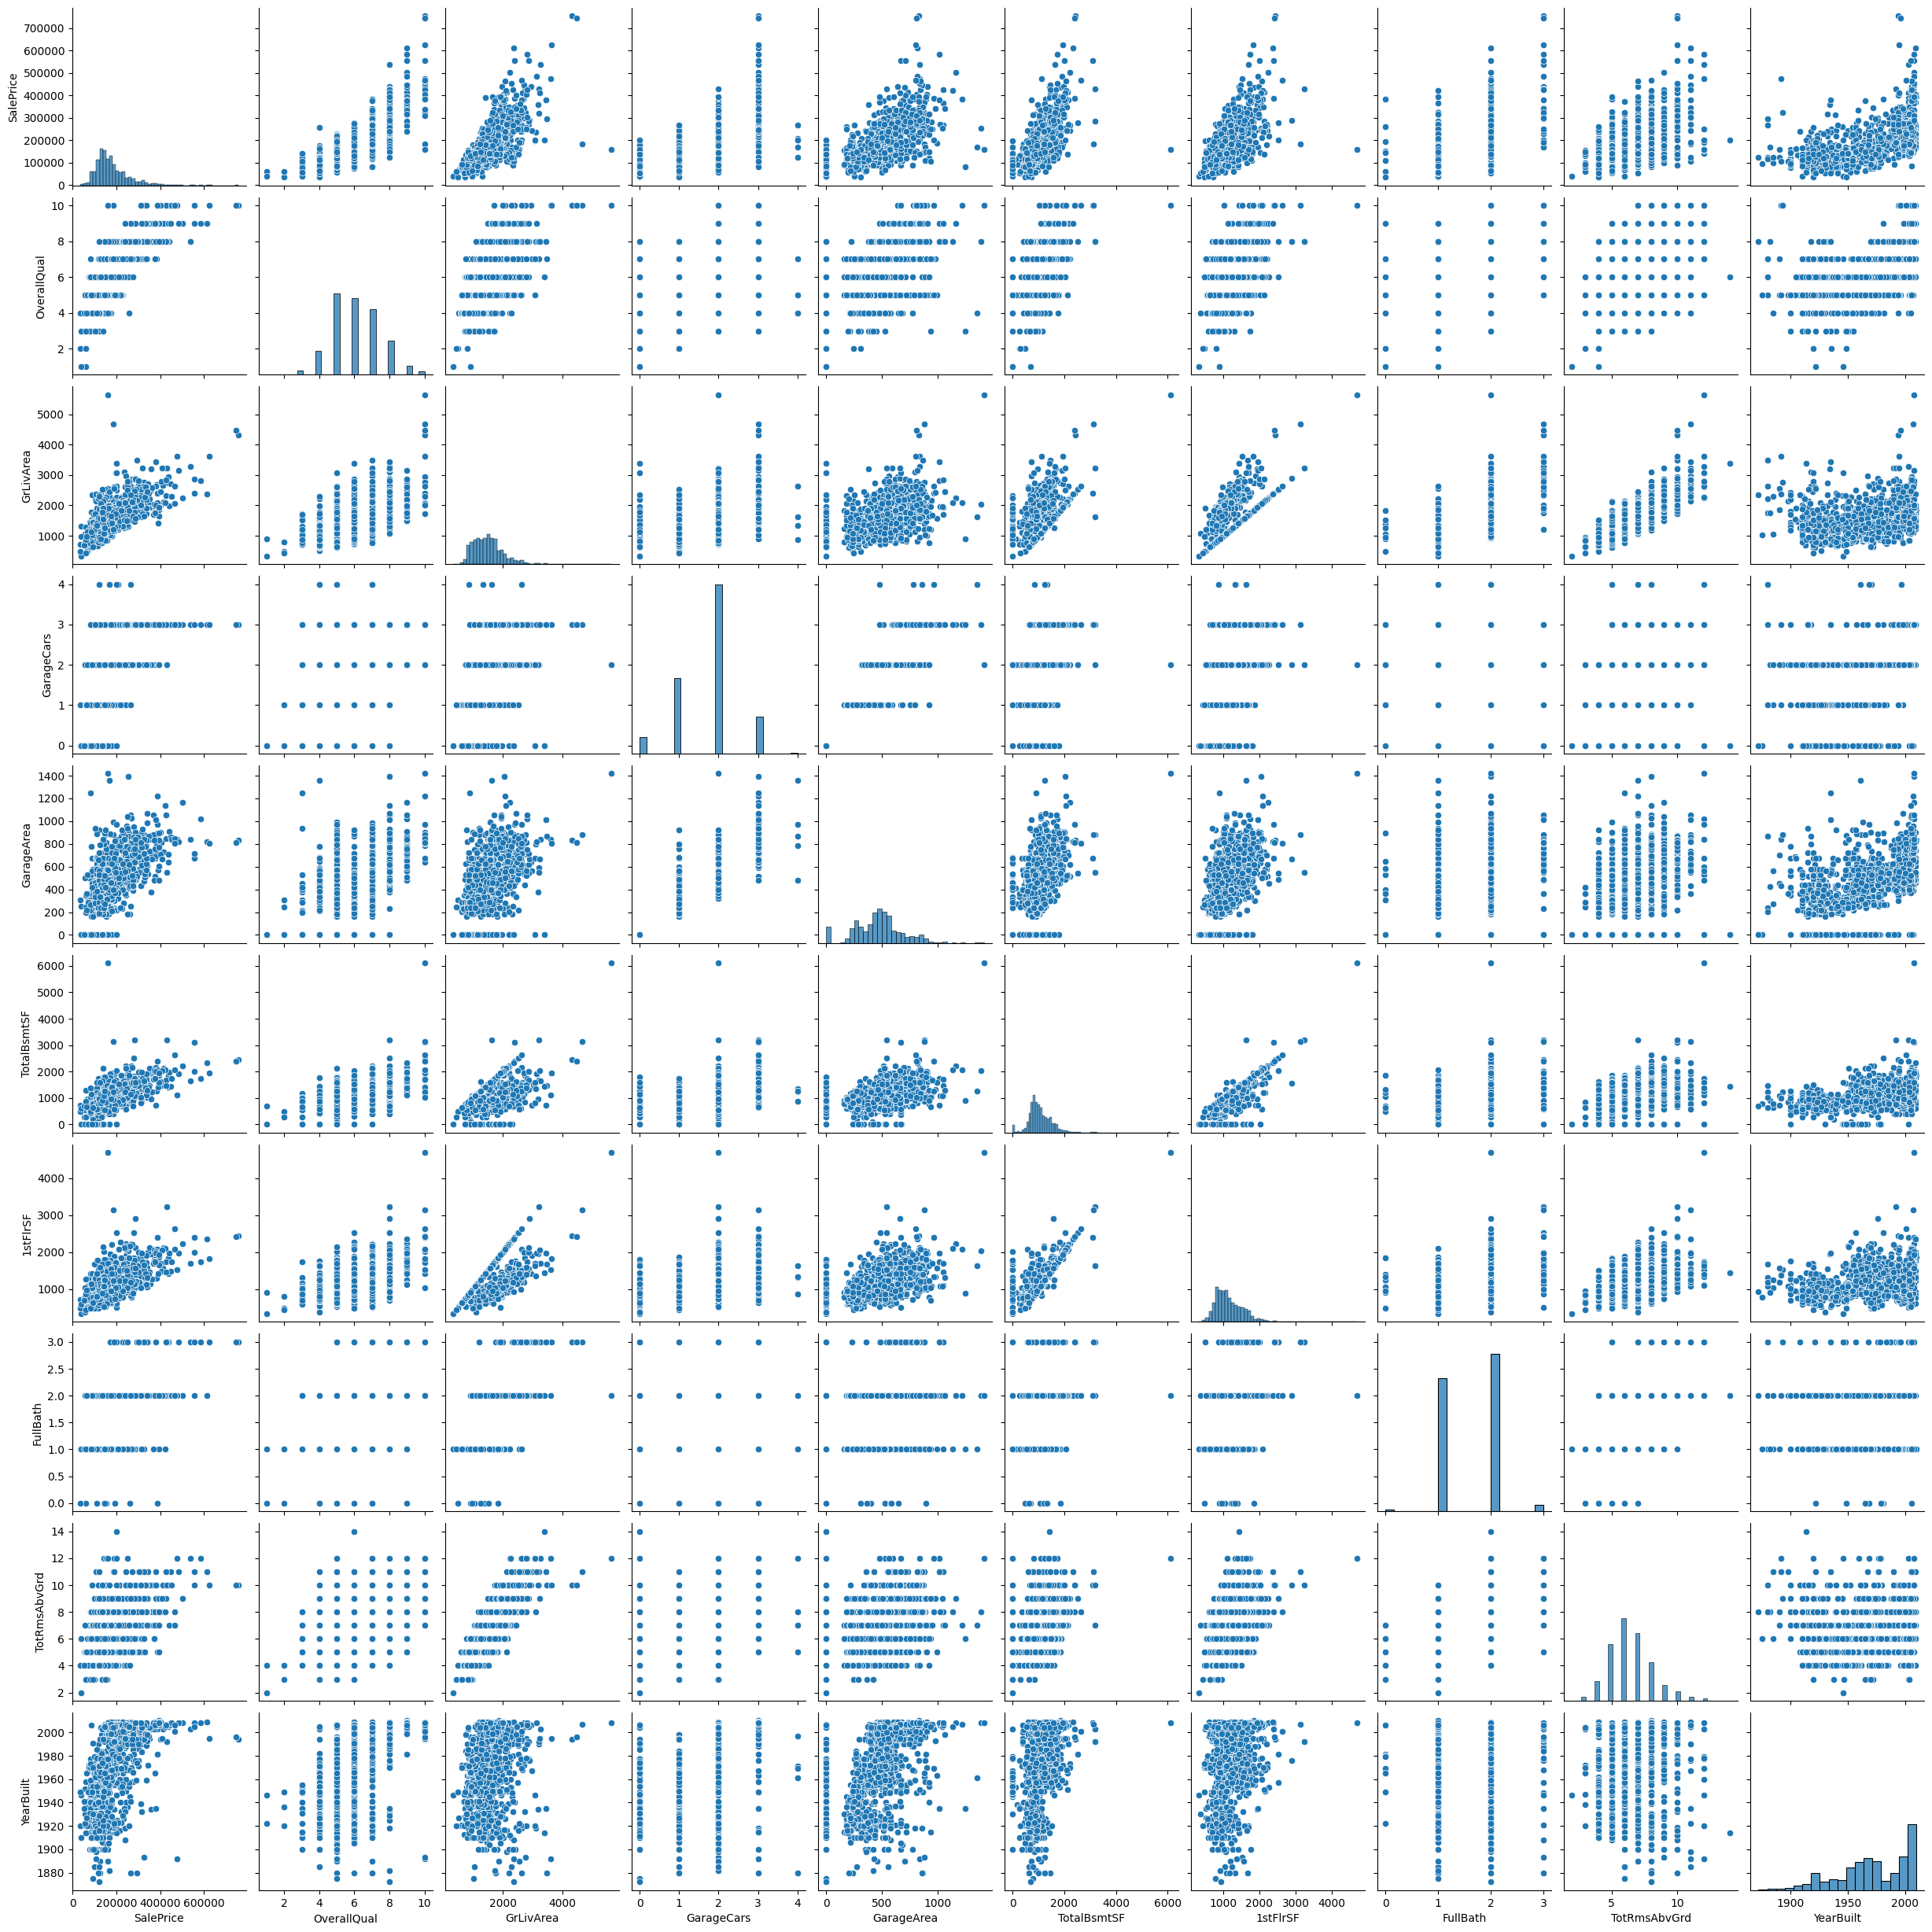

In [82]:
sns.pairplot(df_train[cols])

### 결측치 처리 

In [93]:
total = df_train.isnull().sum()

In [105]:
cnt = df_train.isnull().count()

In [106]:
percent = total / cnt

In [107]:
col_tot = pd.concat([total, cnt, percent], axis=1,keys =['total','count','percent'] )
col_tot.head()

,total,count,percent
Id,0,1460,0.000000
MSSubClass,0,1460,0.000000
MSZoning,0,1460,0.000000
LotFrontage,259,1460,0.177397
LotArea,0,1460,0.000000


In [108]:
col_tot.sort_values(by='percent', ascending=False).head(15)

,total,count,percent
PoolQC,1453,1460,0.995205
MiscFeature,1406,1460,0.963014
Alley,1369,1460,0.937671
Fence,1179,1460,0.807534
FireplaceQu,690,1460,0.472603
LotFrontage,259,1460,0.177397
GarageYrBlt,81,1460,0.055479
GarageCond,81,1460,0.055479
GarageType,81,1460,0.055479
GarageFinish,81,1460,0.055479


In [115]:
col_tot1 = col_tot[col_tot['total'] > 0]

In [119]:
col_tot1.nlargest(10,'percent')

,total,count,percent
PoolQC,1453,1460,0.995205
MiscFeature,1406,1460,0.963014
Alley,1369,1460,0.937671
Fence,1179,1460,0.807534
FireplaceQu,690,1460,0.472603
LotFrontage,259,1460,0.177397
GarageType,81,1460,0.055479
GarageYrBlt,81,1460,0.055479
GarageFinish,81,1460,0.055479
GarageQual,81,1460,0.055479


In [120]:
col_tot1.nsmallest(10,'percent')

,total,count,percent
Electrical,1,1460,0.000685
MasVnrType,8,1460,0.005479
MasVnrArea,8,1460,0.005479
BsmtQual,37,1460,0.025342
BsmtCond,37,1460,0.025342
BsmtFinType1,37,1460,0.025342
BsmtExposure,38,1460,0.026027
BsmtFinType2,38,1460,0.026027
GarageType,81,1460,0.055479
GarageYrBlt,81,1460,0.055479


In [125]:
df_train = df_train.drop(col_tot[col_tot['total'] > 1].index,1)

In [126]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [130]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [132]:
df_train.isnull().sum().max()

0

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

### 이상치 처리 
#### SalePrice 1차원데이터를 2차원 가상축([:,np.newaxis])으로 변환하여 정규화함  

In [141]:
sale_std = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

In [144]:
sale_std

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

### 아래 코드는 numpy 배열 ale_std의 첫 번째 열을 기준으로 정렬한 후, 가장 작은 값부터 상위 10개의 인덱스를 반환합니다.
#### - [:,0]는 ale_std 배열의 모든 행에서 첫 번째 열만 선택하는 것을 의미합니다.
#### - argsort() 함수는 선택된 열의 값들을 기준으로 오름차순으로 정렬하고, 각 값에 대한 인덱스를 반환합니다.
#### - [:10]는 반환된 인덱스 중에서 처음부터 10개까지만 선택하는 것을 의미합니다.

In [143]:
sale_std[:,0].argsort()[:10]

array([ 495,  916,  968,  533,   30,  710, 1337,  705, 1325,  812],
      dtype=int64)